In [ ]:
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns

def pretty_ax(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(
        axis='both',  
        which='both',      
        bottom=True,     
        top=False,
        left=False,
        labelbottom=True,
        labelleft = True)
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
cancergpt = pd.read_csv("./results/hold_out_cell_line_CancerGPT_embedding.csv")
scfoundation = pd.read_csv("./results/hold_out_cell_line_scFoundation_embedding.csv")
gexpr = pd.read_csv("./results/hold_out_cell_line_gene_expression.csv")

data = cancergpt
data["CancerGPT"] = data["prediction"]
data.drop(columns=['prediction'], inplace=True)
data["scFoundation"] = scfoundation["prediction"]
data["GeneExpression"] = gexpr["prediction"]

In [4]:
allcancer = data.cancer_type.unique().tolist()
alldrug = data.pubchem_cid.unique().tolist()
allcellline = data.cell_line.unique().tolist()

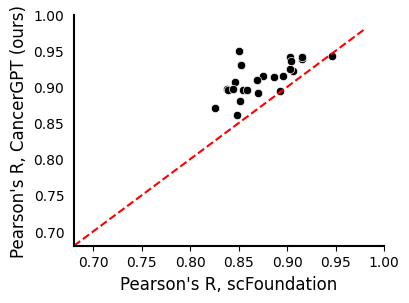

In [22]:
### PCC per cancer type: scFoundation vs CancerGPT ###

rest_cancer = []
for can in allcancer:
    selectmeta = data[data.cancer_type==can].copy()
    cancergpt_pear = pearsonr(selectmeta.CancerGPT.values,selectmeta.ground_truth.values)[0]
    scfoundation_pear = pearsonr(selectmeta.scFoundation.values,selectmeta.ground_truth.values)[0]
    rest_cancer.append([can,cancergpt_pear,scfoundation_pear,cancergpt_pear-scfoundation_pear])
rest_cancer = pd.DataFrame(rest_cancer,columns=['Name','CancerGPT_P','scFoundation_P','Diff_P'])

figsize(4,3)
ax=sns.scatterplot(data=rest_cancer,x='scFoundation_P',y='CancerGPT_P',color='black')
pretty_ax(ax)
sns.lineplot(x=[0.68,0.98],y=[0.68,0.98],linestyle='--', c="red")
#plt.title('Cancer type')
plt.xlabel("Pearson's R, scFoundation", fontsize=12)
plt.ylabel("Pearson's R, CancerGPT (ours)", fontsize=12)
plt.xlim(0.68,1)
plt.ylim(0.68,1)
plt.xticks([0.7,0.75,0.8,0.85,0.9,0.95,1]);
ax.tick_params(axis='both', which='major', labelsize=10)
plt.savefig("figures/ct_sc_new.png", dpi=300, bbox_inches="tight")
#plt.savefig("figures/ct_sc.png", dpi=300, bbox_inches="tight")


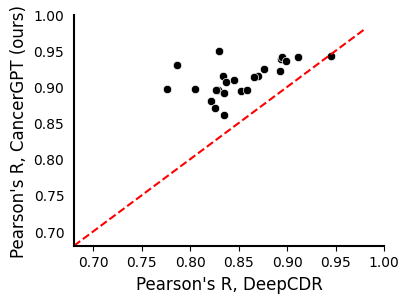

In [ ]:
### PCC per cancer type: DeepCDR vs CancerGPT ###

rest_cancer = []
for can in allcancer:
    selectmeta = data[data.cancer_type==can].copy()
    cancergpt_pear = pearsonr(selectmeta.CancerGPT.values,selectmeta.ground_truth.values)[0]
    scfoundation_pear = pearsonr(selectmeta.GeneExpression.values,selectmeta.ground_truth.values)[0]
    rest_cancer.append([can,cancergpt_pear,scfoundation_pear,cancergpt_pear-scfoundation_pear])
rest_cancer = pd.DataFrame(rest_cancer,columns=['Name','CancerGPT_P','scFoundation_P','Diff_P'])

figsize(4,3)
ax=sns.scatterplot(data=rest_cancer,x='scFoundation_P',y='CancerGPT_P',color='black')
pretty_ax(ax)
sns.lineplot(x=[0.68,0.98],y=[0.68,0.98],linestyle='--', c="red")
#plt.title('Cancer type')
plt.xlabel("Pearson's R, DeepCDR", fontsize=12)
plt.ylabel("Pearson's R, CancerGPT (ours)", fontsize=12)
plt.xlim(0.68,1)
plt.ylim(0.68,1)
plt.xticks([0.7,0.75,0.8,0.85,0.9,0.95,1]);
ax.tick_params(axis='both', which='major', labelsize=10)
plt.savefig("figures/ct_dcdp.png", dpi=300, bbox_inches="tight")


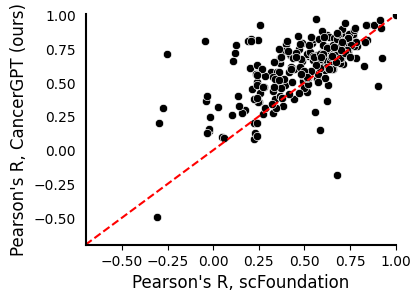

In [25]:
### PCC per drug: scFoundation vs CancerGPT ###

rest_cancer = []
for can in alldrug:
    selectmeta = data[data.pubchem_cid==can].copy()
    cancergpt_pear = pearsonr(selectmeta.CancerGPT.values,selectmeta.ground_truth.values)[0]
    scfoundation_pear = pearsonr(selectmeta.scFoundation.values,selectmeta.ground_truth.values)[0]
    rest_cancer.append([can,cancergpt_pear,scfoundation_pear,cancergpt_pear-scfoundation_pear])
rest_cancer = pd.DataFrame(rest_cancer,columns=['Name','CancerGPT_P','scFoundation_P','Diff_P'])

figsize(4,3)
ax=sns.scatterplot(data=rest_cancer,x='scFoundation_P',y='CancerGPT_P',color='black')
pretty_ax(ax)
sns.lineplot(x=[-0.7,0.98],y=[-0.7,0.98],linestyle='--', c="red")
#plt.title('Cancer type')
plt.xlabel("Pearson's R, scFoundation", fontsize=12)
plt.ylabel("Pearson's R, CancerGPT (ours)", fontsize=12)
plt.xlim(-0.7,1)
plt.ylim(-0.7,1.01)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.savefig("figures/d_sc.png", dpi=300, bbox_inches="tight")
#plt.savefig("figures/ct_sc.png", dpi=300, bbox_inches="tight")

/tmp/ipykernel_93537/3748847268.py:7: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  scfoundation_pear = pearsonr(selectmeta.GeneExpression.values,selectmeta.ground_truth.values)[0]


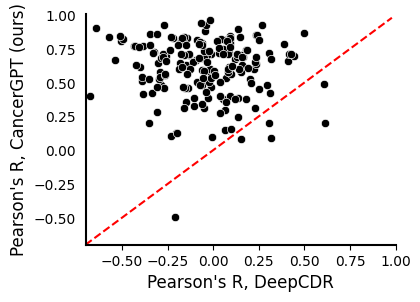

In [ ]:
### PCC per drug: DeepCDR vs CancerGPT ###

rest_cancer = []
for can in alldrug:
    selectmeta = data[data.pubchem_cid==can].copy()
    cancergpt_pear = pearsonr(selectmeta.CancerGPT.values,selectmeta.ground_truth.values)[0]
    scfoundation_pear = pearsonr(selectmeta.GeneExpression.values,selectmeta.ground_truth.values)[0]
    rest_cancer.append([can,cancergpt_pear,scfoundation_pear,cancergpt_pear-scfoundation_pear])
rest_cancer = pd.DataFrame(rest_cancer,columns=['Name','CancerGPT_P','scFoundation_P','Diff_P'])

figsize(4,3)
ax=sns.scatterplot(data=rest_cancer,x='scFoundation_P',y='CancerGPT_P',color='black')
pretty_ax(ax)
sns.lineplot(x=[-0.7,0.98],y=[-0.7,0.98],linestyle='--', c="red")
#plt.title('Cancer type')
plt.xlabel("Pearson's R, DeepCDR", fontsize=12)
plt.ylabel("Pearson's R, CancerGPT (ours)", fontsize=12)
plt.xlim(-0.7,1)
plt.ylim(-0.7,1.01)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.savefig("figures/d_dcdp.png", dpi=300, bbox_inches="tight")